In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import *

import pandas as pd
import numpy as np
import matplotlib.dates as mdates



from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [3]:
df=pd.read_csv("./CSV/금리,환율_전처리.csv",index_col='일자',encoding='euc-kr')

In [4]:
df1=pd.read_csv("../삼성전자 공매도.csv")

In [5]:
df2=df1.drop(labels=range(0,258),axis=0)

In [6]:
df2.set_index('일자', inplace=True)
print(df2)

            공매도 수량(전체)  공매도 수량(잔고수량)    공매도 금액(전체)  공매도 금액(잔고금액)
일자                                                              
2020-03-13     3790257      10333836  1.840610e+11  5.161750e+11
2020-03-12     1959497       9629815  9.909309e+10  4.891950e+11
2020-03-11     3067990       9321255  1.624100e+11  4.856370e+11
2020-03-10      754357       9117118  4.101148e+10  4.977950e+11
2020-03-09     3159715       9165522  1.711350e+11  4.967710e+11
...                ...           ...           ...           ...
2016-07-06        2767         79864  3.967474e+09  1.134870e+11
2016-07-05        5824         92203  8.549802e+09  1.354460e+11
2016-07-04       20068         91154  2.937135e+10  1.336320e+11
2016-07-01        5721        105182  8.403998e+09  1.541970e+11
2016-06-30        7199         73661  1.020219e+10  1.049670e+11

[909 rows x 4 columns]


In [7]:
df3=pd.merge(df,df2,left_on=['일자'],right_index=True)
df3

,금리,달러환율,공매도 수량(전체),공매도 수량(잔고수량),공매도 금액(전체),공매도 금액(잔고금액)
일자,,,,,,
2016-07-01,1.210,1152.6,5721,105182,8.403998e+09,1.541970e+11
2016-07-04,1.224,1147.5,20068,91154,2.937135e+10,1.336320e+11
2016-07-05,1.217,1148.1,5824,92203,8.549802e+09,1.354460e+11
2016-07-06,1.203,1153.0,2767,79864,3.967474e+09,1.134870e+11
2016-07-07,1.208,1165.8,4442,77400,6.364331e+09,1.122300e+11
...,...,...,...,...,...,...
2020-03-09,1.038,1191.4,3159715,9165522,1.711350e+11,4.967710e+11
2020-03-10,1.082,1201.4,754357,9117118,4.101148e+10,4.977950e+11
2020-03-11,1.086,1196.7,3067990,9321255,1.624100e+11,4.856370e+11


In [8]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (10, 6)

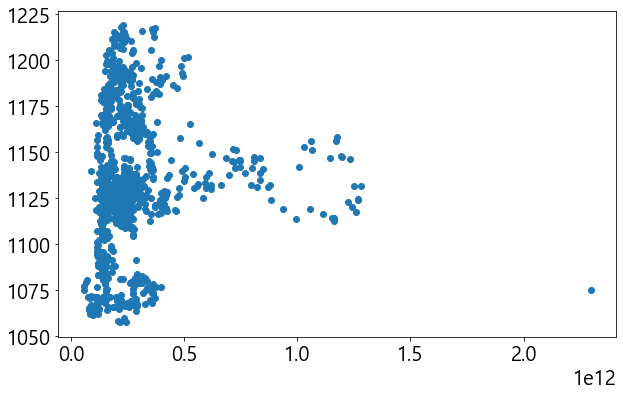

In [9]:
plt.scatter(df3['공매도 금액(잔고금액)'],df3['달러환율'])

In [10]:
pearsonr(df3['공매도 금액(잔고금액)'],df3['달러환율'])

(0.05301170133898639, 0.1104160939795408)